<a href="https://colab.research.google.com/github/Guillermo100472109/Aprendizaje-Automatico/blob/main/Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
Realice un EDA simplificado, principalmente para determinar cúantas variables e instancias hay, qué
variables son categóricas/ordinales/numéricas, si hay variables categóricas con alta cardinalidad, qué
variables tienen valores faltantes y cuántos, si hay columnas constantes o columnas de ID, y si se trata
de un problema de regresión o clasificación. Si es esto último, ¿está desbalanceado?
Este EDA se utilizará como guía cuando haya que llevar a cabo el preproceso de los datos.
https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [108]:
df = pd.read_csv('/content/attrition_availabledata_09.csv')
df


,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.434015,8,3,3,4.0,2.0,3.0,25,Travel_Rarely,Research & Development,...,Y,11,8,1,4.0,3,3,1,2,No
1,6.572103,15,4,3,3.0,3.0,3.0,18,Non-Travel,Research & Development,...,Y,18,8,0,0.0,5,0,0,0,Yes
2,8.075888,4,3,3,1.0,4.0,3.0,33,Travel_Frequently,Sales,...,Y,14,8,1,15.0,2,15,8,12,No
3,8.694279,6,3,3,4.0,3.0,2.0,37,Travel_Rarely,Sales,...,Y,14,8,0,17.0,3,3,1,0,No
4,6.646379,9,3,4,1.0,4.0,3.0,56,Travel_Rarely,Human Resources,...,Y,21,8,0,5.0,3,4,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,5.622518,16,2,4,1.0,2.0,2.0,50,Travel_Rarely,Sales,...,Y,23,8,0,28.0,2,10,1,6,No
2936,9.553096,4,3,3,4.0,2.0,3.0,41,Travel_Rarely,Research & Development,...,Y,19,8,2,8.0,0,5,1,2,No
2937,6.734752,19,1,3,2.0,2.0,4.0,40,Travel_Rarely,Research & Development,...,Y,12,8,0,7.0,2,5,1,3,No
2938,8.035525,14,2,3,3.0,4.0,3.0,44,Travel_Rarely,Research & Development,...,Y,12,8,0,8.0,2,2,2,2,No


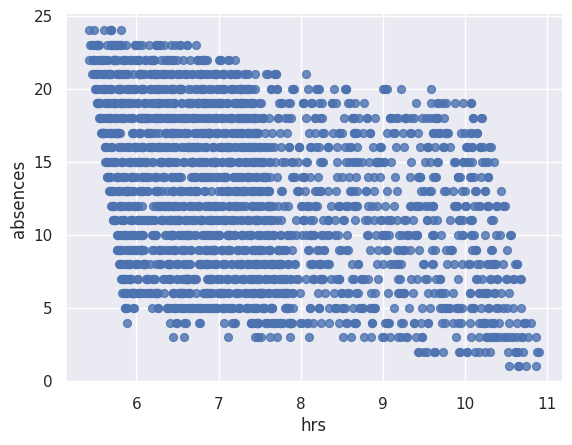

In [109]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='hrs', y='absences', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Se interpreta que las abstenciones laborales son anuales y las horas la media de horas trabajadas diaria. Las personas que trabajan menos de las 8 horas diarias correspondientes de media tienen mayor núemero de abstenciones, acalando así que cuanto más veces faltas al trabajo menos horas de media semanal tienes.

In [110]:
df.count()

,0
hrs,2940
absences,2940
JobInvolvement,2940
PerformanceRating,2940
EnvironmentSatisfaction,2923
JobSatisfaction,2928
WorkLifeBalance,2911
Age,2940
BusinessTravel,2940
Department,2940


In [111]:
df.count(axis='columns')

,0
0,31
1,31
2,31
3,31
4,31
...,...
2935,31
2936,31
2937,31
2938,31


**IMPORTANTE: ELIMINAR ESTAS MISMAS COLUMNAS EN LOS DATOS DE COMPETICIÓN**

Columnas superfluas: gender, employeecount, over18, employeeID, standardHours

In [112]:
df = df.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)
df.head(5)

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.434015,8,3,3,4.0,2.0,3.0,25,Travel_Rarely,Research & Development,...,100960,0.0,11,1,4.0,3,3,1,2,No
1,6.572103,15,4,3,3.0,3.0,3.0,18,Non-Travel,Research & Development,...,109650,1.0,18,0,0.0,5,0,0,0,Yes
2,8.075888,4,3,3,1.0,4.0,3.0,33,Travel_Frequently,Sales,...,31800,1.0,14,1,15.0,2,15,8,12,No
3,8.694279,6,3,3,4.0,3.0,2.0,37,Travel_Rarely,Sales,...,20860,4.0,14,0,17.0,3,3,1,0,No
4,6.646379,9,3,4,1.0,4.0,3.0,56,Travel_Rarely,Human Resources,...,25590,1.0,21,0,5.0,3,4,1,0,Yes


In [113]:
df.shape

(2940, 26)

In [114]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 26)


In [115]:
print(df.isnull().sum())

hrs                         0
absences                    0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    17
JobSatisfaction            12
WorkLifeBalance            29
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         10
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           5
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64


Se observa que del conjunto total de datos hay 2940 líneas totales, pero hay varias variables que no tienen todos esos datos. Hay que eliminar las filas sin esos datos.

In [116]:
df = df.dropna()
print(df.isnull().sum())

hrs                        0
absences                   0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64


Se han borrados todos los valores null

In [117]:
df.count()

,0
hrs,2868
absences,2868
JobInvolvement,2868
PerformanceRating,2868
EnvironmentSatisfaction,2868
JobSatisfaction,2868
WorkLifeBalance,2868
Age,2868
BusinessTravel,2868
Department,2868


Ahora ya tenemos todas las filas completas

<Axes: xlabel='hrs'>

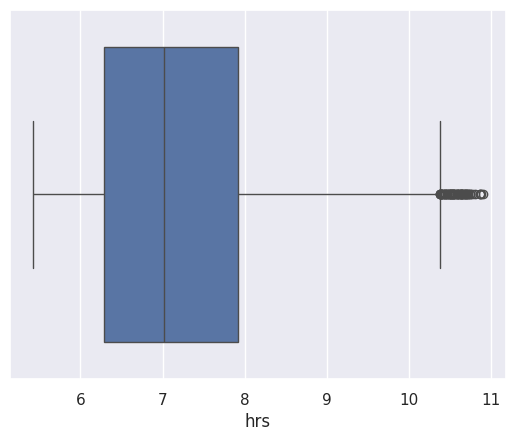

In [118]:
sns.boxplot(x=df['hrs'])

Vemos que hay un grupo de outliers, veamos la relación más de cerca.

<Axes: xlabel='hrs', ylabel='absences'>

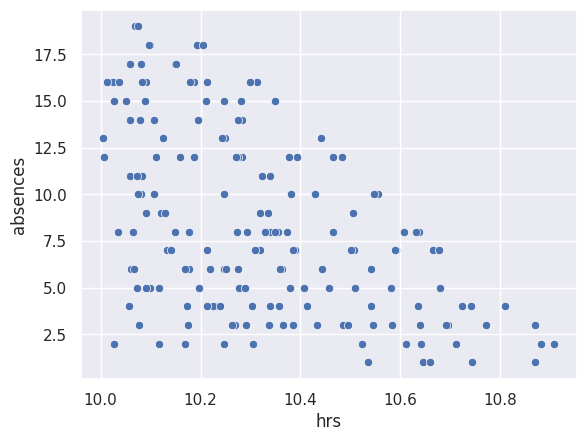

In [119]:
 filtered_df = df[df['hrs'] > 10]  # Create a new DataFrame with filtered data
#sns.boxplot(x=filtered_df['hrs']) # Create the box plot using the filtered data
filtered_df.count()
sns.scatterplot(x=filtered_df['hrs'], y=filtered_df['absences'])

<Axes: xlabel='hrs', ylabel='absences'>

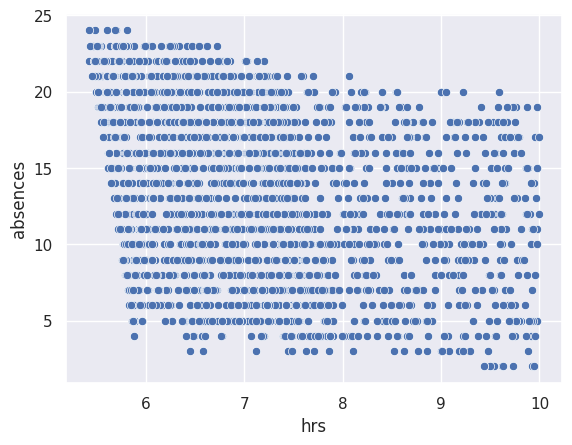

In [120]:
 filtered_df = df[df['hrs'] < 10]  # Create a new DataFrame with filtered data
#sns.boxplot(x=filtered_df['hrs']) # Create the box plot using the filtered data
filtered_df.count()
sns.scatterplot(x=filtered_df['hrs'], y=filtered_df['absences'])

No podemos sacar conclusiones sobre esta relación, asi que seguimos investigando posibles relaciones.
Ahora veremos si el estado civil influye en el número de faltas

<Axes: xlabel='MaritalStatus', ylabel='absences'>

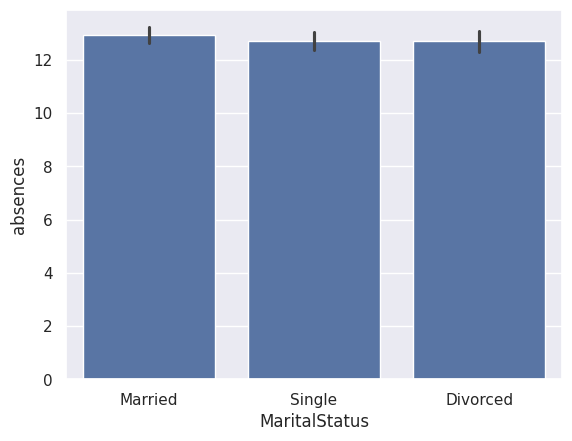

In [121]:
sns.barplot(x='MaritalStatus', y='absences', data=df, estimator=np.mean)


No se ve una relación clara entre el estado civil y el número de faltas, por tanto no es una columna interesante


Para finalizar el EDA vamos a comprobar el balance de la columna Attrition.

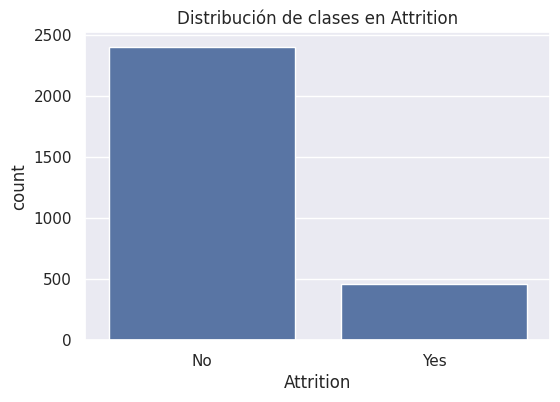


Proporciones:
Attrition
No     0.838215
Yes    0.161785
Name: proportion, dtype: float64


In [122]:
# Gráfico de distribución de clases
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title('Distribución de clases en Attrition')
plt.show()

# Proporciones exactas
attrition_counts = df['Attrition'].value_counts(normalize=True)
print(f"\nProporciones:\n{attrition_counts}")

El análisis del desbalance de clases revela que la variable objetivo 'Attrition' presenta una distribución desigual, con aproximadamente un 84% de empleados que no abandonan ('No') y solo un 16% que sí lo hacen ('Yes'). Este desbalance nos indica que encontrar un modelo con un balance_accuray superior al 84% es crucial para crear un modelo correcto, ya que un modelo con balance_accuracy inferior a 84% será superado por el modelo dummy, que asumiría NO siempre y acertaría con un 84% de probabilidades, indicando que el modelo dummy es mejor que nuestro modelo, en caso de que no podamos superar este umbral.

Tras mirar varias posibles columnas superflas sin encontrar resultados. Hemos terminado el EDA simplificado. Ahora tenemos los datos limpios para poder crear los modelos correspondientes.

# Elección de  Evaluación

Para garantizar una evaluación robusta y confiable del rendimiento del modelo, se adoptará un esquema de evaluación en dos niveles: una evaluación externa (outer) para estimar el rendimiento futuro del modelo y una evaluación interna (inner) para la selección y optimización de modelos.

3.1 Evaluación Externa

La estimación del rendimiento futuro del modelo se llevará a cabo utilizando la estrategia de Holdout, con una partición de los datos en train (2/3) y test (1/3). El objetivo es disponer de un conjunto de test  que no haya sido utilizado durante el proceso de entrenamiento ni en la selección del modelo, asegurando así una evaluación realista.

Las métricas principales a utilizar serán:

Balanced Accuracy: Adecuada en escenarios con desbalance de clases, ya que calcula el promedio entre la tasa de verdaderos positivos (TPR) y la tasa de verdaderos negativos (TNR).
True Positive Rate (TPR) y True Negative Rate (TNR): Para evaluar la precisión en la detección de la clase positiva y negativa, respectivamente.
Accuracy: Aunque es una métrica estándar, puede ser menos representativa en conjuntos de datos desbalanceados, por lo que se utilizará de manera complementaria.
Matriz de confusión: Para proporcionar una visualización detallada de los errores del modelo y evaluar posibles sesgos en la clasificación.
Es importante destacar que la partición de test se utilizará únicamente al final, cuando se haya decidido cuál es la mejor alternativa de modelado. Hasta ese momento, la evaluación se realizará exclusivamente en el conjunto de entrenamiento para evitar la fuga de datos y una sobreestimación del desempeño del modelo.

3.2 Evaluación Interna:

La evaluación interna se empleará para la optimización de hiperparámetros (Hyperparameter Optimization - HPO) y la comparación de distintos modelos. Para ello, se utilizarán técnicas de validación cruzada en el conjunto de entrenamiento, como:

K-Fold Cross-Validation: Dividiendo los datos de entrenamiento en k subconjuntos, entrenando el modelo en k-1 y validándolo en el restante, iterativamente.
Stratified K-Fold Cross-Validation: En caso de un desbalance de clases, se empleará una variante estratificada para mantener la proporción de clases en cada partición.
Este enfoque permitirá evaluar distintas configuraciones del modelo y seleccionar la mejor sin recurrir al conjunto de test, asegurando que el rendimiento final refleje la capacidad real del modelo para generalizar a datos no vistos.

En resumen, se establece una estrategia de doble evaluación para garantizar un proceso sistemático y riguroso en la selección y validación del modelo, minimizando el riesgo de sobreajuste y maximizando su capacidad predictiva en datos futuros.


# Métodos Básicos: KNN y Trees

Evaluación inicial de KNN con hiperparámetros por omisión

TRANSFORMACIÓN DE COLUMNAS CATEGORICAS EN NUMÉRICAS

Aqui queremos ver en el dataframe a utilizar, qué columnas son categóricas y cuáles son numéricas, para después usarlas en el pipeline. Para realizar esta tarea concreta, se uso IA.

In [123]:
import pandas as pd
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier()

# VER LAS COL POR TIPOS
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(categorical_cols)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(numerical_cols)

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Attrition']
['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


PIPELINE DE NUM COL

Aqui se realiza el pipeline de las columnas categóricas y el escalado correspondiente. Además se separan en train y test el dataframe alrededor de la columna 'Atrittion'. Obteniendo un valor del modelo inicial KNN con HP por defecto.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Assuming 'df' is your original DataFrame
# Enumeramos las columnas por tipos para el pipeline
numeric_features = ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
                    'EnvironmentSatisfaction', 'JobSatisfaction',
                    'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education',
                    'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
                    'PercentSalaryHike', 'StockOptionLevel',
                    'TotalWorkingYears', 'TrainingTimesLastYear',
                    'YearsAtCompany', 'YearsSinceLastPromotion',
                    'YearsWithCurrManager']
categorical_features = ['BusinessTravel', 'Department', 'EducationField',
                        'JobRole', 'MaritalStatus']
# Create transformers
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Separate into train/test
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,
                                                    random_state=42, stratify=y)


# Create the pipeline
pipe_knn = Pipeline([
    ('scaler', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Train the model
data = cross_val_score(pipe_knn, X_train, y_train, cv=3, scoring='balanced_accuracy')
print(data)
print(data.mean())



[0.57616369 0.58321516 0.58304243]
0.580807092712913


Obtenemos un valor muy bajo usando KNN con valores por defecto. Vamos a ver si calculando unos mejores valores en el escalador e imputador nos ayuda a mejorar este resultado.

Calculamos a través de una grid los mejores scalers y métodos de imputación. Los escaladores a comparar son: minmax, standard y robust. Para los imputadores se comparan mean y median.

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Assuming 'df' is your original DataFrame
# Enumeramos las columnas por tipos para el pipeline
numeric_features = ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
                    'EnvironmentSatisfaction', 'JobSatisfaction',
                    'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education',
                    'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
                    'PercentSalaryHike', 'StockOptionLevel',
                    'TotalWorkingYears', 'TrainingTimesLastYear',
                    'YearsAtCompany', 'YearsSinceLastPromotion',
                    'YearsWithCurrManager']
categorical_features = ['BusinessTravel', 'Department', 'EducationField',
                        'JobRole', 'MaritalStatus']
# Separate into train/test
X = df.drop(['Attrition'], axis=1) # X should not contain the target variable
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer()),
                ('scaler', StandardScaler()) # Placeholder for scaler
            ]), numeric_features),
            ('cat', Pipeline([
                ('encoder', OneHotEncoder(handle_unknown="ignore"))
            ]), categorical_features)
        ])),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy') # Using balanced_accuracy for scoring
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best balanced accuracy score:", grid_search.best_score_)

# Evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
print("Test balanced accuracy score:", balanced_accuracy_score(y_test, y_pred))


Best parameters: {'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__num__scaler': StandardScaler()}
Best balanced accuracy score: 0.5867716789907725
Test balanced accuracy score: 0.6355926060166727


Una vez hecho esto elegimos el mejor imputador 'mean' y el mejor escalador StandarScaler(). Ahora procedemos a la HPO.

KNN with default hyperparameters (3-fold CV): 0.5867716789907725
KNN with hyperparameter optimization (best_score_): 0.7745356017073749
Decision Tree with default hyperparameters (3-fold CV): 0.7829988340271058
Decision Tree with hyperparameter optimization (best_score_): 0.7363520454254792


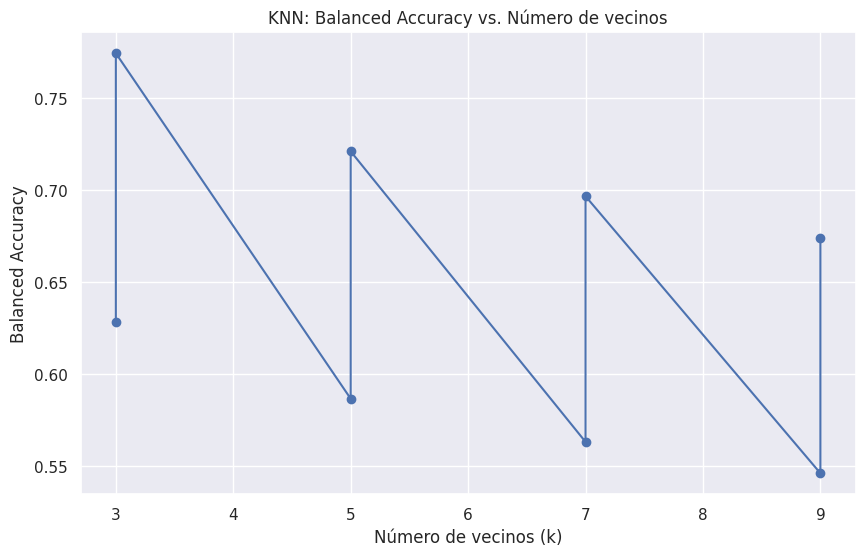

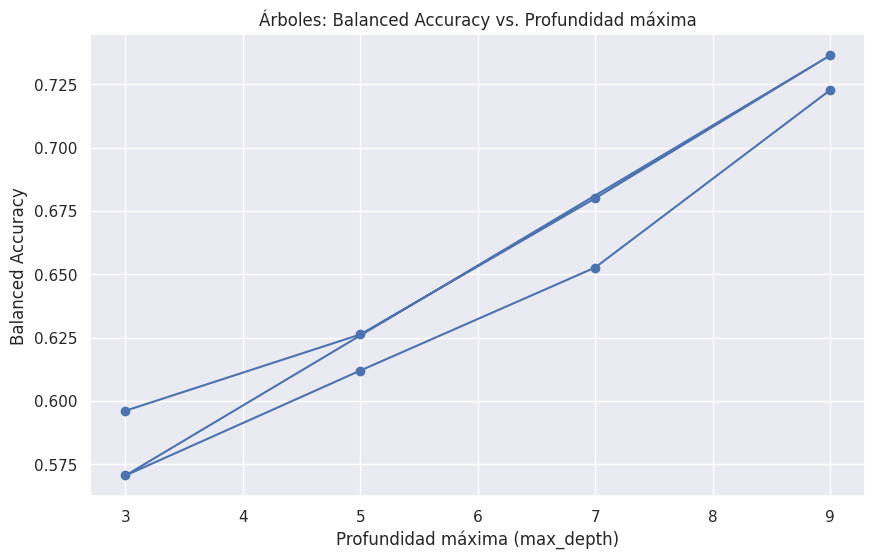

In [126]:
# Separate into train/test
X = df.drop(['Attrition'], axis=1) # X should not contain the target variable
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# 1. KNN with default hyperparameters and 3-fold CV
knn_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),  # Use the best imputer
                ('scaler', StandardScaler())  # Use the best scaler
            ]), numeric_features),
            ('cat', Pipeline([
                ('encoder', OneHotEncoder(handle_unknown="ignore"))
            ]), categorical_features)
        ])),
    ('knn', KNeighborsClassifier())
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=cv, scoring='balanced_accuracy')
print("KNN with default hyperparameters (3-fold CV):", knn_scores.mean())


# 2. KNN with hyperparameter optimization and best_score_
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Example hyperparameters to tune
    'knn__weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=cv, scoring='balanced_accuracy')
grid_search_knn.fit(X_train, y_train)
print("KNN with hyperparameter optimization (best_score_):", grid_search_knn.best_score_)


# 3. Decision Tree with default hyperparameters and 3-fold CV
tree_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),  # Use the best imputer
                ('scaler', StandardScaler())  # Use the best scaler
            ]), numeric_features),
            ('cat', Pipeline([
                ('encoder', OneHotEncoder(handle_unknown="ignore"))
            ]), categorical_features)
        ])),
    ('tree', DecisionTreeClassifier())
])

tree_scores = cross_val_score(tree_pipeline, X_train, y_train, cv=cv, scoring='balanced_accuracy')
print("Decision Tree with default hyperparameters (3-fold CV):", tree_scores.mean())


# 4. Decision Tree with hyperparameter optimization and best_score_ (3 inner folds)
param_grid_tree = {
    'tree__max_depth': [3, 5, 7, 9],  # Example hyperparameters to tune
    'tree__criterion': ['gini', 'entropy']
}

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Inner CV for HPO
grid_search_tree = GridSearchCV(tree_pipeline, param_grid_tree, cv=inner_cv, scoring='balanced_accuracy')
grid_search_tree.fit(X_train, y_train)
print("Decision Tree with hyperparameter optimization (best_score_):", grid_search_tree.best_score_)

# GRAFICAS COMPARATIVAS DE HPO DE KNN Y ARBOLES

# Extraer resultados de la búsqueda de hiperparámetros
results = pd.DataFrame(grid_search_knn.cv_results_)
k_values = results['param_knn__n_neighbors']
scores = results['mean_test_score']

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.title('KNN: Balanced Accuracy vs. Número de vecinos')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Balanced Accuracy')
plt.grid(True)
plt.show()

# Para árboles de decisión
tree_results = pd.DataFrame(grid_search_tree.cv_results_)
depths = tree_results['param_tree__max_depth']
tree_scores = tree_results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(depths, tree_scores, marker='o')
plt.title('Árboles: Balanced Accuracy vs. Profundidad máxima')
plt.xlabel('Profundidad máxima (max_depth)')
plt.ylabel('Balanced Accuracy')
plt.grid(True)
plt.show()

---
Tras calcular los mejores hiperparametros tenemos cuatro modelos a comparar, donde el modelo de árbol con hiperparámetros por defecto es el mejor de todos. Aún así tenemos que mejorar esta precisión ya que nuestro objetivo es no solo alcanzar, si no superar el modelo dummy del 84% de precisión.

---







MIRAR PORQUÉ ESTE MODELO TIENE UN ACC MÁS ALTO QUE EL BUENO DE ARBOLES

In [128]:

tree_pipeline.fit(X_train, y_train)

# 5. Evaluate on test set (outer evaluation)
y_pred = tree_pipeline.predict(X_test)
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Evaluation metrics
print("\nTest Set Evaluation:")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Prepare competition predictions (only after final model selection)
df_competition = pd.read_csv('attrition_competition_09.csv')
df_competition = df_competition.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)

# Make competition predictions
competition_preds = tree_pipeline.predict(df_competition)

# Save predictions and model (as required in assignment)
pd.DataFrame(competition_preds, columns=['Attrition']).to_csv('predicciones.csv', index=False)
joblib.dump(tree_pipeline, 'modelo_final.pkl')

Balanced Accuracy: 0.8398614634932142
Confusion Matrix:
[[746  55]
 [ 39 116]]

Test Set Evaluation:
Balanced Accuracy: 0.8399

Confusion Matrix:
[[746  55]
 [ 39 116]]

Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.93      0.94       801
         Yes       0.68      0.75      0.71       155

    accuracy                           0.90       956
   macro avg       0.81      0.84      0.83       956
weighted avg       0.91      0.90      0.90       956



['modelo_final.pkl']

ESTE PARECE EL BUENO AÑADIR LA MATRIZ Y REPORT DE ARRIBA


In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import joblib

# 1. Cargar TODOS los datos disponibles para el modelo final
df_full_train = pd.read_csv('attrition_availabledata_09.csv')

# 2. Preprocesamiento (consistente con lo anterior)
df_full_train = df_full_train.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)
target = 'Attrition'

# Separar características y objetivo
X_full = df_full_train.drop(target, axis=1)
y_full = df_full_train[target]

# ***CHANGE***: Split into train/validation
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

# 4. Entrenar el modelo final con la parte de entrenamiento de los datos disponibles
print("Entrenando el modelo final con los datos de entrenamiento...")
tree_pipeline.fit(X_train_full, y_train_full)

# ***CHANGE***: Evaluate on the validation set and print Confusion Matrix and Classification Report
print("Evaluando en el conjunto de validación...")
val_preds = tree_pipeline.predict(X_val_full)
balanced_acc = balanced_accuracy_score(y_val_full, val_preds)
print(f"Balanced Accuracy (on validation set): {balanced_acc:.4f}")

# ***ADDED***: Confusion Matrix and Classification Report for validation set
print("\nConfusion Matrix (Validation Set):")
print(confusion_matrix(y_val_full, val_preds))
print("\nClassification Report (Validation Set):")
print(classification_report(y_val_full, val_preds))

# 5. Cargar datos de competición y prepararlos
df_competition = pd.read_csv('attrition_competition_09.csv')
df_competition = df_competition.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)

# 6. Hacer predicciones para la competición
print("Generando predicciones para los datos de competición...")
competition_preds = tree_pipeline.predict(df_competition)

# 7. Guardar modelo y predicciones como requiere la práctica
print("Guardando modelo y predicciones...")
pd.DataFrame(competition_preds, columns=['Attrition']).to_csv('predicciones.csv', index=False)
joblib.dump(tree_pipeline, 'modelo_final.pkl')

print("¡Proceso completado!")
print(f"Número de predicciones generadas: {len(competition_preds)}")
print(f"Distribución de clases en predicciones: {pd.Series(competition_preds).value_counts().to_dict()}")

Entrenando el modelo final con los datos de entrenamiento...
Evaluando en el conjunto de validación...
Balanced Accuracy (on validation set): 0.8273

Confusion Matrix (Validation Set):
[[468  25]
 [ 28  67]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

          No       0.94      0.95      0.95       493
         Yes       0.73      0.71      0.72        95

    accuracy                           0.91       588
   macro avg       0.84      0.83      0.83       588
weighted avg       0.91      0.91      0.91       588

Generando predicciones para los datos de competición...
Guardando modelo y predicciones...
¡Proceso completado!
Número de predicciones generadas: 1470
Distribución de clases en predicciones: {'No': 1241, 'Yes': 229}


# Avanzados: Modelos Lineales y SVMS

ELIMINAR EL DE ABAJO

In [130]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# 1. Cargar y preparar datos (usando mismo preprocesamiento que antes)
df_train = pd.read_csv('attrition_availabledata_09.csv')
df_train = df_train.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)

# Definir características
numeric_features = ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
                  'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
                  'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
target = 'Attrition'

X = df_train.drop(target, axis=1)
y = df_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline de preprocesamiento común
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Función para evaluar modelos
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    print(f"\nTiempo de entrenamiento: {train_time:.4f}s")
    print(f"Tiempo de predicción: {predict_time:.4f}s")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model

# =================================================================
# 1. MODELOS LINEALES
# =================================================================

print("\n" + "="*60)
print("MODELOS LINEALES")
print("="*60)

# a) Regresión Logística sin regularización
print("\n>>> Regresión Logística sin regularización")
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty=None, max_iter=1000, random_state=42))
])
evaluate_model(lr_pipeline, X_train, y_train, X_test, y_test)

# b) Regresión Logística con regularización L1
print("\n>>> Regresión Logística L1 (Lasso)")
lr_l1_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42))
])
evaluate_model(lr_l1_pipeline, X_train, y_train, X_test, y_test)

# c) Ajuste de hiperparámetros para modelo lineal
print("\n>>> Optimización de hiperparámetros para Regresión Logística")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['saga', 'liblinear']
}

lr_grid = GridSearchCV(
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    param_grid,
    cv=5,
    scoring='balanced_accuracy'
)

lr_grid = evaluate_model(lr_grid, X_train, y_train, X_test, y_test)
print("\nMejores parámetros encontrados:")
print(lr_grid.best_params_)

# Análisis de características importantes
print("\nAnálisis de características importantes:")
#***CHANGE***: Get the classifier from the best estimator pipeline
lr_best = lr_grid.best_estimator_.named_steps['classifier']
#***CHANGE***: Get the preprocessor from the grid search's best estimator
feature_names = (numeric_features +
                list(lr_grid.best_estimator_.named_steps['preprocessor'] # Access preprocessor from the grid search
                     .named_transformers_['cat']
                     .named_steps['encoder']
                     .get_feature_names_out(categorical_features)))

coefs = pd.DataFrame({
    'feature': feature_names,
    'coef': lr_best.coef_[0],
    'abs_coef': np.abs(lr_best.coef_[0])
}).sort_values('abs_coef', ascending=False)

print("\n10 características más importantes:")
print(coefs.head(10))

# =================================================================
# 2. SUPPORT VECTOR MACHINES (SVMs)
# =================================================================

print("\n" + "="*60)
print("SUPPORT VECTOR MACHINES")
print("="*60)

# a) SVM con parámetros por defecto
print("\n>>> SVM con parámetros por defecto")
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
evaluate_model(svm_pipeline, X_train, y_train, X_test, y_test)

# b) Ajuste de hiperparámetros para SVM
print("\n>>> Optimización de hiperparámetros para SVM")
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42))
    ]),
    param_grid_svm,
    cv=3,  # Reducido por tiempo de cómputo
    scoring='balanced_accuracy'
)

svm_grid = evaluate_model(svm_grid, X_train, y_train, X_test, y_test)
print("\nMejores parámetros encontrados:")
print(svm_grid.best_params_)

# =================================================================
# 3. COMPARACIÓN FINAL
# =================================================================

print("\n" + "="*60)
print("COMPARACIÓN DE MODELOS")
print("="*60)

models = {
    'Logistic Regression (default)': lr_pipeline,
    'Logistic Regression (optimized)': lr_grid.best_estimator_,
    'SVM (default)': svm_pipeline,
    'SVM (optimized)': svm_grid.best_estimator_
}

results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Balanced Accuracy': balanced_acc,
        'Training Time (s)': train_time
    })

results_df = pd.DataFrame(results)
print("\nComparación de rendimiento:")
print(results_df.sort_values('Balanced Accuracy', ascending=False))
joblib.dump(svm_grid.best_estimator_, 'modelo_svm_optimizado.pkl')


MODELOS LINEALES

>>> Regresión Logística sin regularización

Tiempo de entrenamiento: 0.0310s
Tiempo de predicción: 0.0079s
Balanced Accuracy: 0.6026

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92       493
         Yes       0.63      0.23      0.34        95

    accuracy                           0.85       588
   macro avg       0.75      0.60      0.63       588
weighted avg       0.83      0.85      0.82       588


>>> Regresión Logística L1 (Lasso)

Tiempo de entrenamiento: 0.4673s
Tiempo de predicción: 0.0082s
Balanced Accuracy: 0.6026

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92       493
         Yes       0.63      0.23      0.34        95

    accuracy                           0.85       588
   macro avg       0.75      0.60      0.63       588
weighted avg       0.83      0.85      0.82       588


>>> Optimización de

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 


Tiempo de entrenamiento: 51.4937s
Tiempo de predicción: 0.0125s
Balanced Accuracy: 0.6026

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92       493
         Yes       0.63      0.23      0.34        95

    accuracy                           0.85       588
   macro avg       0.75      0.60      0.63       588
weighted avg       0.83      0.85      0.82       588


Mejores parámetros encontrados:
{'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}

Análisis de características importantes:

10 características más importantes:
                             feature      coef  abs_coef
26    EducationField_Human Resources  0.747604  0.747604
43              MaritalStatus_Single  0.706403  0.706403
20         BusinessTravel_Non-Travel -0.698772  0.698772
21  BusinessTravel_Travel_Frequently  0.696616  0.696616
37         JobRole_Research Director  0.661258  0.661258
0                      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Comparación de rendimiento:
                             Model  Balanced Accuracy  Training Time (s)
3                  SVM (optimized)           0.900384           0.220272
2                    SVM (default)           0.702221           0.584482
1  Logistic Regression (optimized)           0.602605           6.271872
0    Logistic Regression (default)           0.602605           0.046657


['modelo_svm_optimizado.pkl']

<Figure size 1000x600 with 0 Axes>

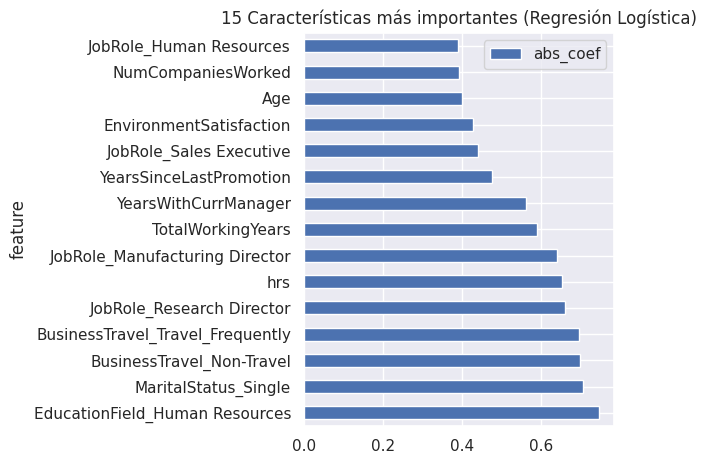

In [131]:
# Gráfico de características importantes
plt.figure(figsize=(10, 6))
coefs.head(15).plot.barh(x='feature', y='abs_coef')
plt.title('15 Características más importantes (Regresión Logística)')
plt.tight_layout()
plt.show()

ENTRENAIMIENTO DEL MODELO FINAL CON EL MEJOR MODELO ENCONTRADO. PREDICCIONES DE DATOS DE COMPETICIÓN


Cargando el modelo SVM optimizado...
Entrenando el modelo SVM optimizado con los datos de entrenamiento...
Evaluando en el conjunto de validación...
Balanced Accuracy (on validation set): 0.9004

Confusion Matrix (Validation Set):
[[483  10]
 [ 17  78]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

          No       0.97      0.98      0.97       493
         Yes       0.89      0.82      0.85        95

    accuracy                           0.95       588
   macro avg       0.93      0.90      0.91       588
weighted avg       0.95      0.95      0.95       588

Generando predicciones para los datos de competición...
Guardando modelo y predicciones...
¡Proceso completado!
Número de predicciones generadas: 1470
Distribución de clases en predicciones: {'No': 1260, 'Yes': 210}


<ipython-input-132-a297f140f58f>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=results_df, x='Balanced Accuracy', y='Model', palette='viridis', edgecolor='black')


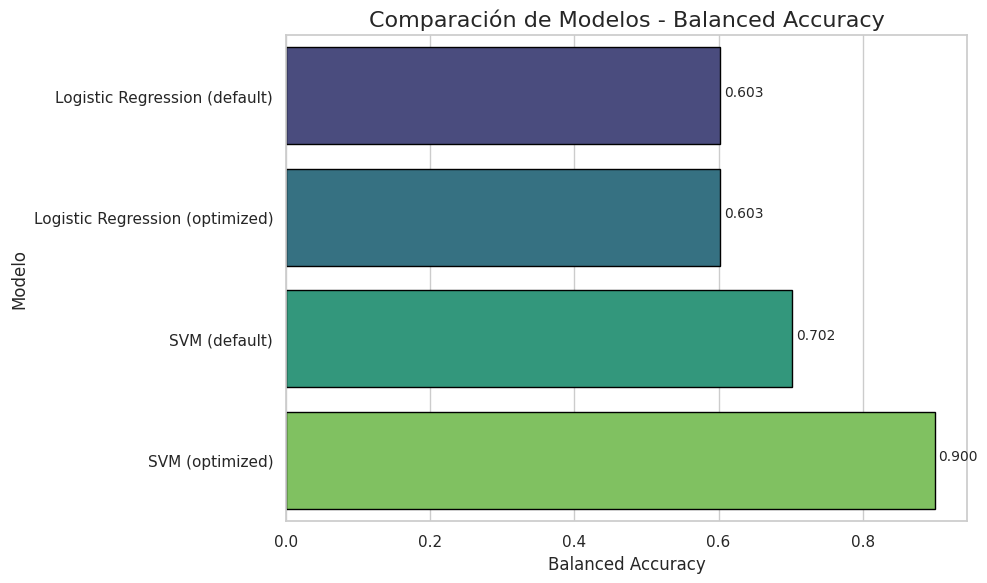

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import joblib

# 1. Cargar TODOS los datos disponibles para el modelo final
df_full_train = pd.read_csv('attrition_availabledata_09.csv')

# 2. Preprocesamiento (consistente con lo anterior)
df_full_train = df_full_train.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)
target = 'Attrition'

# Separar características y objetivo
X_full = df_full_train.drop(target, axis=1)
y_full = df_full_train[target]

# **CHANGE**: Split into train/validation
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

# 3. Cargar el mejor modelo SVM optimizado desde entrenamiento anterior
# Asegúrate de haber guardado previamente svm_grid.best_estimator_
# Si aún no lo has hecho, puedes volver a ejecutar el bloque donde haces GridSearchCV con SVM

# Suponiendo que lo guardaste como:
# joblib.dump(svm_grid.best_estimator_, 'modelo_svm_optimizado.pkl')

print("Cargando el modelo SVM optimizado...")
svm_pipeline = joblib.load('modelo_svm_optimizado.pkl')

# 4. Entrenar el modelo final con los datos de entrenamiento
print("Entrenando el modelo SVM optimizado con los datos de entrenamiento...")
svm_pipeline.fit(X_train_full, y_train_full)

# Evaluar en validación
print("Evaluando en el conjunto de validación...")
val_preds = svm_pipeline.predict(X_val_full)
balanced_acc = balanced_accuracy_score(y_val_full, val_preds)
print(f"Balanced Accuracy (on validation set): {balanced_acc:.4f}")

print("\nConfusion Matrix (Validation Set):")
print(confusion_matrix(y_val_full, val_preds))
print("\nClassification Report (Validation Set):")
print(classification_report(y_val_full, val_preds))

# 5. Cargar datos de competición y prepararlos
df_competition = pd.read_csv('attrition_competition_09.csv')
df_competition = df_competition.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)

# 6. Hacer predicciones para la competición
print("Generando predicciones para los datos de competición...")
competition_preds = svm_pipeline.predict(df_competition)

# 7. Guardar modelo y predicciones
print("Guardando modelo y predicciones...")
pd.DataFrame(competition_preds, columns=['Attrition']).to_csv('predicciones_svm.csv', index=False)
joblib.dump(svm_pipeline, 'modelo_svm_final.pkl')

print("¡Proceso completado!")
print(f"Número de predicciones generadas: {len(competition_preds)}")
print(f"Distribución de clases en predicciones: {pd.Series(competition_preds).value_counts().to_dict()}")

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito
sns.set(style='whitegrid')

# Tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear barplot
ax = sns.barplot(data=results_df, x='Balanced Accuracy', y='Model', palette='viridis', edgecolor='black')

# Etiquetas
plt.title('Comparación de Modelos - Balanced Accuracy', fontsize=16)
plt.xlabel('Balanced Accuracy', fontsize=12)
plt.ylabel('Modelo', fontsize=12)

# Mostrar valores en cada barra
for i in ax.patches:
    ax.text(i.get_width() + 0.005, i.get_y() + 0.4, f'{i.get_width():.3f}', fontsize=10)

plt.tight_layout()
plt.show()

SVM FINAL DESDE CERO



In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import joblib

# ========================
# 1. CARGA Y PREPROCESAMIENTO
# ========================

df = pd.read_csv('attrition_availabledata_09.csv')
df = df.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)

target = 'Attrition'
numeric_features = ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
                    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
                    'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
                    'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
                    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                    'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

X = df.drop(target, axis=1)
y = df[target]

# ========================
# 2. DIVISIÓN EN TRAIN / VALIDATION
# ========================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ========================
# 3. PIPELINE Y GRIDSEARCHCV PARA SVM
# ========================
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=3,
    scoring='balanced_accuracy',
    verbose=1,
    n_jobs=-1
)

print("Entrenando SVM con búsqueda de hiperparámetros...")
svm_grid.fit(X_train, y_train)
print("Mejores parámetros encontrados:", svm_grid.best_params_)

# ========================
# 4. EVALUACIÓN EN VALIDACIÓN
# ========================
best_svm = svm_grid.best_estimator_
val_preds = best_svm.predict(X_val)

print("\nBalanced Accuracy (Validación):", balanced_accuracy_score(y_val, val_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_preds))
print("\nClassification Report:")
print(classification_report(y_val, val_preds))

# ========================
# 5. PREDICCIÓN PARA COMPETICIÓN
# ========================
df_comp = pd.read_csv('attrition_competition_09.csv')
df_comp = df_comp.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)

print("\nGenerando predicciones para la competición...")
competition_preds = best_svm.predict(df_comp)

# ========================
# 6. GUARDAR MODELO Y PREDICCIONES
# ========================
pd.DataFrame(competition_preds, columns=['Attrition']).to_csv('predicciones.csv', index=False)
joblib.dump(best_svm, 'modelo_final_svm.pkl')

print("\n¡Proceso completado!")
print(f"Número de predicciones: {len(competition_preds)}")
print(f"Distribución de clases: {pd.Series(competition_preds).value_counts().to_dict()}")

Entrenando SVM con búsqueda de hiperparámetros...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejores parámetros encontrados: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Balanced Accuracy (Validación): 0.9003843279598591

Confusion Matrix:
[[483  10]
 [ 17  78]]

Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.98      0.97       493
         Yes       0.89      0.82      0.85        95

    accuracy                           0.95       588
   macro avg       0.93      0.90      0.91       588
weighted avg       0.95      0.95      0.95       588


Generando predicciones para la competición...

¡Proceso completado!
Número de predicciones: 1470
Distribución de clases: {'No': 1260, 'Yes': 210}


# Resultados y modelo final

# Elección abierta


[0]	validation_0-logloss:0.66507
[1]	validation_0-logloss:0.63903
[2]	validation_0-logloss:0.62364
[3]	validation_0-logloss:0.59780
[4]	validation_0-logloss:0.57773
[5]	validation_0-logloss:0.55835
[6]	validation_0-logloss:0.54178
[7]	validation_0-logloss:0.52514
[8]	validation_0-logloss:0.51348
[9]	validation_0-logloss:0.50048
[10]	validation_0-logloss:0.48449
[11]	validation_0-logloss:0.47366
[12]	validation_0-logloss:0.46053
[13]	validation_0-logloss:0.45170
[14]	validation_0-logloss:0.44284
[15]	validation_0-logloss:0.43592
[16]	validation_0-logloss:0.42712
[17]	validation_0-logloss:0.41638
[18]	validation_0-logloss:0.40959
[19]	validation_0-logloss:0.40388
[20]	validation_0-logloss:0.39919
[21]	validation_0-logloss:0.39309
[22]	validation_0-logloss:0.38566
[23]	validation_0-logloss:0.37920
[24]	validation_0-logloss:0.37356
[25]	validation_0-logloss:0.36707
[26]	validation_0-logloss:0.36070
[27]	validation_0-logloss:0.35474
[28]	validation_0-logloss:0.35137
[29]	validation_0-loglos

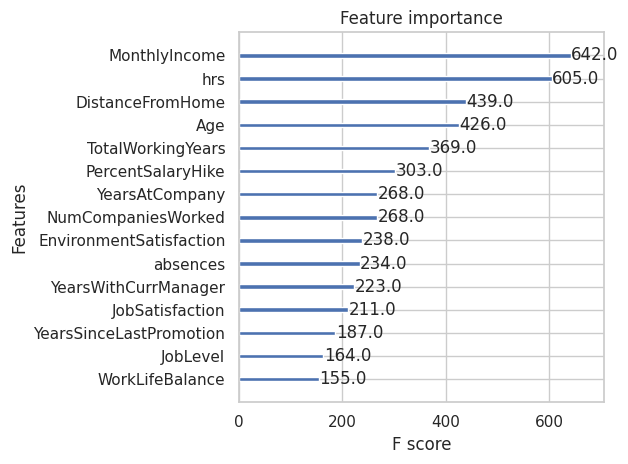


🔹 Modelo guardado como 'xgboost_model.pkl'


In [134]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
import time

# 1. Cargar y preparar datos
df = pd.read_csv('attrition_availabledata_09.csv')
df = df.drop(['Gender', 'EmployeeCount', 'Over18', 'EmployeeID', 'StandardHours'], axis=1)

# Codificar target y variables categóricas
le = LabelEncoder()
y = le.fit_transform(df['Attrition'])
X = df.drop('Attrition', axis=1)
X = pd.get_dummies(X)  # One-hot encoding simple

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Configuración de XGBoost para datos desbalanceados
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=sum(y_train == 0)/sum(y_train == 1),  # Auto-balanceo
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    early_stopping_rounds=10
)

# 3. Entrenamiento con evaluación
start_time = time.time()
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)
train_time = time.time() - start_time

# 4. Evaluación
y_pred = model.predict(X_test)
print(f"\n⏱ Tiempo entrenamiento: {train_time:.2f}s")
print(f"✅ Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Visualización de características importantes
xgb.plot_importance(model, max_num_features=15)
plt.tight_layout()
plt.show()

# 6. Guardar modelo
joblib.dump(model, 'xgboost_model.pkl')
print("\n🔹 Modelo guardado como 'xgboost_model.pkl'")